In [1]:
import numpy as np
import pandas as pd
import os
import librosa
import matplotlib.pyplot as plt
import IPython
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Reshape,MaxPooling2D, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.utils import to_categorical
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
import sys

Mounted at /content/drive/


## Concatenate all datasets

In [2]:
import pandas as pd
import os

folder_path = '/content/drive/MyDrive/CodecfakeAndWavefake'
combined_df = pd.read_csv(folder_path + '/' + 'combined_output.csv')

In [3]:
combined_df.head()

,audio_id,real_or_fake,spectral_centroid_mean,spectral_centroid_std,spectral_centroid_var,spectral_centroid_min,spectral_centroid_max,spectral_centroid_range,spectral_centroid_25th_percentile,spectral_centroid_50th_percentile,...,shimmer_dda,hnr,voicedcount,npause,originaldur,intensity_duration,speakingrate,articulationrate,asd,totalpauseduration
0,p261_301,R,1532.962571,1174.201245,1.378749e+06,261.785381,4926.603129,4664.817748,609.816185,1246.342369,...,0.062498,16.187173,7.0,0.0,2.517542,2.517542,2.780490,5.028736,0.198857,1.125542
1,p261_301,F04,1468.198778,1166.110954,1.359815e+06,257.057108,4997.935328,4740.878220,629.363805,1215.672808,...,0.138674,12.690535,7.0,0.0,2.520000,2.520000,2.777778,5.028736,0.198857,1.128000
2,p261_301,F03,1484.831490,1162.005696,1.350257e+06,250.965046,4810.808407,4559.843361,685.228599,1159.940418,...,0.064133,15.804868,8.0,0.0,2.520000,2.520000,3.174603,6.493506,0.154000,1.288000
3,p261_301,F06,1484.831490,1162.005696,1.350257e+06,250.965046,4810.808407,4559.843361,685.228599,1159.940418,...,0.064133,15.804868,8.0,0.0,2.520000,2.520000,3.174603,6.493506,0.154000,1.288000
4,p261_301,F02,1633.625124,1262.769121,1.594586e+06,285.220234,5149.280253,4864.060019,734.234624,1292.243847,...,0.064076,16.230126,6.0,0.0,2.520000,2.520000,2.380952,5.000000,0.200000,1.320000


In [5]:
combined_df['real_or_fake_general'] = combined_df['real_or_fake'].apply(lambda x: 'F' if x.startswith('F') else x)
combined_df

,audio_id,real_or_fake,spectral_centroid_mean,spectral_centroid_std,spectral_centroid_var,spectral_centroid_min,spectral_centroid_max,spectral_centroid_range,spectral_centroid_25th_percentile,spectral_centroid_50th_percentile,...,hnr,voicedcount,npause,originaldur,intensity_duration,speakingrate,articulationrate,asd,totalpauseduration,real_or_fake_general
0,p261_301,R,1532.962571,1174.201245,1.378749e+06,261.785381,4926.603129,4664.817748,609.816185,1246.342369,...,16.187173,7.0,0.0,2.517542,2.517542,2.780490,5.028736,0.198857,1.125542,R
1,p261_301,F04,1468.198778,1166.110954,1.359815e+06,257.057108,4997.935328,4740.878220,629.363805,1215.672808,...,12.690535,7.0,0.0,2.520000,2.520000,2.777778,5.028736,0.198857,1.128000,F
2,p261_301,F03,1484.831490,1162.005696,1.350257e+06,250.965046,4810.808407,4559.843361,685.228599,1159.940418,...,15.804868,8.0,0.0,2.520000,2.520000,3.174603,6.493506,0.154000,1.288000,F
3,p261_301,F06,1484.831490,1162.005696,1.350257e+06,250.965046,4810.808407,4559.843361,685.228599,1159.940418,...,15.804868,8.0,0.0,2.520000,2.520000,3.174603,6.493506,0.154000,1.288000,F
4,p261_301,F02,1633.625124,1262.769121,1.594586e+06,285.220234,5149.280253,4864.060019,734.234624,1292.243847,...,16.230126,6.0,0.0,2.520000,2.520000,2.380952,5.000000,0.200000,1.320000,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245120,p245_259,F04,875.965243,571.497606,3.266095e+05,231.897932,2566.745088,2334.847156,365.371727,789.348138,...,7.920100,3.0,0.0,2.573333,2.573333,1.165803,2.331606,0.428889,1.286667,F
245121,p245_259,F05,974.797359,596.347470,3.556303e+05,244.529820,2471.889648,2227.359828,408.064257,905.516980,...,9.832865,3.0,0.0,2.562500,2.562500,1.170732,2.341463,0.427083,1.281250,F
245122,p245_259,F01,1005.466264,584.085186,3.411555e+05,249.153276,2448.050795,2198.897519,425.817950,977.177546,...,8.290265,3.0,1.0,1.894125,1.894125,1.583845,2.741917,0.364708,0.800000,F
245123,p245_259,F06,853.386422,582.544685,3.393583e+05,187.462609,2418.541725,2231.079116,304.529808,801.820199,...,8.607306,3.0,0.0,2.600000,2.600000,1.153846,2.279635,0.438667,1.284000,F


## Neural Network

In [7]:
!pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=a407e469d4492f3056ef31870ca1af7ab8f4001612710613b93ffc006cc7776f
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import lime
from lime import lime_tabular

df = combined_df.dropna()

label_encoder = LabelEncoder()
df['real_or_fake_general'] = label_encoder.fit_transform(df['real_or_fake_general'])

X = df.drop(columns=['audio_id', 'real_or_fake_general', 'real_or_fake'])
y = df['real_or_fake_general']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

def create_neural_network():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

nn_model = create_neural_network()
nn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

nn_predictions = nn_model.predict(X_test).flatten()
nn_binary_predictions = (nn_predictions > 0.5).astype(int)
print("Neural Network Accuracy: ", accuracy_score(y_test, nn_binary_predictions))
print(classification_report(y_test, nn_binary_predictions))


<ipython-input-11-d8256df77d5e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['real_or_fake_general'] = label_encoder.fit_transform(df['real_or_fake_general'])


Epoch 1/10
4696/4696 [==============================] - 16s 3ms/step - loss: 0.1455 - accuracy: 0.9332 - val_loss: 0.1152 - val_accuracy: 0.9497
Epoch 2/10
4696/4696 [==============================] - 29s 6ms/step - loss: 0.1137 - accuracy: 0.9500 - val_loss: 0.1100 - val_accuracy: 0.9514
Epoch 3/10
4696/4696 [==============================] - 23s 5ms/step - loss: 0.1053 - accuracy: 0.9536 - val_loss: 0.1024 - val_accuracy: 0.9553
Epoch 4/10
4696/4696 [==============================] - 15s 3ms/step - loss: 0.0990 - accuracy: 0.9566 - val_loss: 0.1071 - val_accuracy: 0.9533
Epoch 5/10
4696/4696 [==============================] - 15s 3ms/step - loss: 0.0942 - accuracy: 0.9592 - val_loss: 0.0981 - val_accuracy: 0.9578
Epoch 6/10
4696/4696 [==============================] - 16s 3ms/step - loss: 0.0899 - accuracy: 0.9605 - val_loss: 0.0999 - val_accuracy: 0.9577
Epoch 7/10
4696/4696 [==============================] - 16s 3ms/step - loss: 0.0870 - accuracy: 0.9622 - val_loss: 0.0999 - val_ac

157/157 [==============================] - 0s 2ms/step


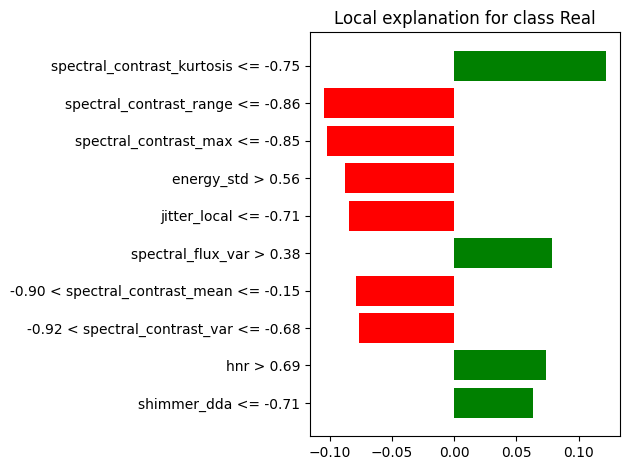

In [10]:

def predict_proba(X):
    predictions = nn_model.predict(X)
    return np.hstack((1-predictions, predictions))


explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_train,
    feature_names=df.columns.drop(['audio_id', 'real_or_fake_general', 'real_or_fake']).tolist(),
    class_names=['Fake', 'Real'],
    mode='classification'
)

i = 10  
exp = explainer.explain_instance(X_test[i], predict_proba, num_features=10)


fig = exp.as_pyplot_figure()
fig.tight_layout()
fig.show()

## Convolutionary Neural Network

<ipython-input-12-411786a9f101>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['real_or_fake_general'] = label_encoder.fit_transform(df['real_or_fake_general'])


Epoch 1/10
4696/4696 [==============================] - 134s 28ms/step - loss: 0.1501 - accuracy: 0.9327 - val_loss: 0.1337 - val_accuracy: 0.9393
Epoch 2/10
4696/4696 [==============================] - 123s 26ms/step - loss: 0.1158 - accuracy: 0.9493 - val_loss: 0.1094 - val_accuracy: 0.9540
Epoch 3/10
4696/4696 [==============================] - 120s 25ms/step - loss: 0.1053 - accuracy: 0.9538 - val_loss: 0.1029 - val_accuracy: 0.9555
Epoch 4/10
4696/4696 [==============================] - 124s 26ms/step - loss: 0.0985 - accuracy: 0.9578 - val_loss: 0.1052 - val_accuracy: 0.9539
Epoch 5/10
4696/4696 [==============================] - 124s 26ms/step - loss: 0.0926 - accuracy: 0.9601 - val_loss: 0.0977 - val_accuracy: 0.9582
Epoch 6/10
4696/4696 [==============================] - 125s 27ms/step - loss: 0.0869 - accuracy: 0.9625 - val_loss: 0.1120 - val_accuracy: 0.9546
Epoch 7/10
4696/4696 [==============================] - 123s 26ms/step - loss: 0.0826 - accuracy: 0.9642 - val_loss: 0

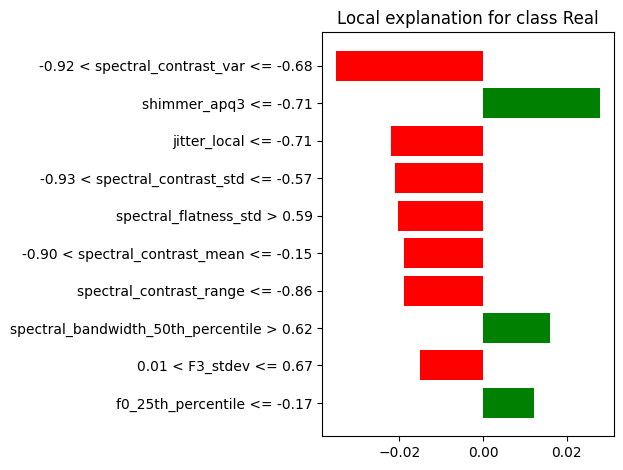

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
import lime
from lime import lime_tabular
import matplotlib.pyplot as plt


df = combined_df.dropna()

label_encoder = LabelEncoder()
df['real_or_fake_general'] = label_encoder.fit_transform(df['real_or_fake_general'])

X = df.drop(columns=['audio_id', 'real_or_fake_general', 'real_or_fake'])
y = df['real_or_fake_general']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape X_scaled for CNN input (batch, steps, channels)
X_scaled = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

def create_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model
nn_model = create_cnn_model((X_train.shape[1], 1))
nn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


nn_predictions = nn_model.predict(X_test).flatten()
nn_binary_predictions = (nn_predictions > 0.5).astype(int)
print("CNN Model Accuracy: ", accuracy_score(y_test, nn_binary_predictions))
print(classification_report(y_test, nn_binary_predictions))

def predict_proba(X):
 
    X = X.reshape(X.shape[0], X.shape[1], 1)
    predictions = nn_model.predict(X)
    return np.hstack((1-predictions, predictions))

explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_train.reshape(X_train.shape[0], X_train.shape[1]),
    feature_names=df.columns.drop(['audio_id', 'real_or_fake_general', 'real_or_fake']).tolist(),
    class_names=['Fake', 'Real'],
    mode='classification'
)

i = 10 
exp = explainer.explain_instance(X_test[i].flatten(), predict_proba, num_features=10)

fig = exp.as_pyplot_figure()
fig.tight_layout()
plt.show()
